Sentiment analysis using Recurrent Neural Network

Libraries Import

In [15]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras import utils

from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

Load and Split Data

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [46]:
word_indexed_imdb = imdb.get_word_index()
reverse_word_indexed_imdb = dict([(value, key) for (key, value) in word_indexed_imdb.items()])
decoded_review = ' '.join([reverse_word_indexed_imdb.get(i - 3, '?') for i in x_train[0]])
print("Sample Review:")
print(decoded_review)
print("Label:", y_train[0])

Sample Review:
and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared w

Data Preprocessing

In [6]:
x_train = pad_sequences(x_train, maxlen=200) # padding with zeroes
x_test = pad_sequences(x_test, maxlen=200)

In [7]:
x_train[2000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,   14,   20, 1870,   39,  454, 2449,  262,
          4,  130,   25,  242,   92,   79,    2,  101,  433,  116,  769,
       1381,  370,  157,    2,   45,   32,   78,   55,   55,   78,   10,
         10,   21,  198,   51,  166,   12,    6,    2,  106,   12,   80,
        202,   25,   53,   74,  195,   52,  919,    4,  433,    4,  128,
         10,   10,   13,   66,   28,   57, 2307,   

Neural Network Creation

In [9]:
model = Sequential()
# number of vectors = 10000
# vector length = 2
# number of tokens = 200
model.add(Embedding(10000, 2, input_length=200))
# SimpleRNN with 8 neurons
model.add(SimpleRNN(8))
# layer for classification
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training Neural Network

In [24]:
history = model.fit(x_train,
                    y_train,
                    epochs = 10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 9s 55ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.4299 - val_accuracy: 0.8970
Epoch 2/10
157/157 [==============================] - 9s 54ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.4419 - val_accuracy: 0.8976
Epoch 3/10
157/157 [==============================] - 7s 45ms/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 0.4224 - val_accuracy: 0.9010
Epoch 4/10
157/157 [==============================] - 8s 53ms/step - loss: 0.0233 - accuracy: 0.9937 - val_loss: 0.3926 - val_accuracy: 0.9028
Epoch 5/10
157/157 [==============================] - 8s 51ms/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.4388 - val_accuracy: 0.9018
Epoch 6/10
157/157 [==============================] - 8s 49ms/step - loss: 0.0267 - accuracy: 0.9930 - val_loss: 0.4583 - val_accuracy: 0.8940
Epoch 7/10
157/157 [==============================] - 9s 54ms/step - loss: 0.0233 - accuracy: 0.9941 - val_loss: 0.3848 - val_accuracy: 0.9004

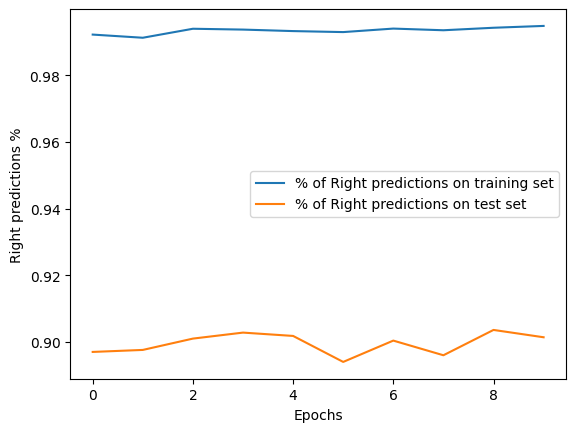

In [26]:
#accuracy: 0.9915 - val_loss: 0.3026 - val_accuracy: 0.9234
plt.plot(history.history['accuracy'],
         label="% of Right predictions on training set")
plt.plot(history.history['val_accuracy'],
         label="% of Right predictions on test set")
plt.xlabel('Epochs')
plt.ylabel('Right predictions %')
plt.legend()
plt.show()

Model Evaluation

In [27]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 8s 10ms/step - loss: 0.8399 - accuracy: 0.8187


Prediction

In [65]:
from keras.preprocessing.text import Tokenizer

In [90]:
# Data Tokenization
comment = 'Best movie'
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts([comment])

In [92]:
# Convert the comment to a sequence of integers
comment_sequence = tokenizer.texts_to_sequences([comment])[0]

In [93]:
padded_comment = pad_sequences([comment_sequence], maxlen=200, value=0)

In [94]:
print("Original Comment Sequence:", comment_sequence)
print("Padded Comment Sequence:", padded_comment)

Original Comment Sequence: [1, 2]
Padded Comment Sequence: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]]


In [95]:
prediction = model.predict(padded_comment)

1/1 [==============================] - 0s 26ms/step


In [96]:
if prediction[0] > 0.5:
    result = "Positive"
else:
    result = "Negative"

print("Input Text:", comment)
print("Prediction:", prediction[0])
print("Result:", result)

Input Text: Best movie
Prediction: [0.7641768]
Result: Positive
